In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori, association_rules 

In [3]:
data = pd.read_csv(r"D:\Data Mining\Data sets for lab report\df\df data.csv") 
data.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [7]:
df = data.copy()

In [9]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [11]:
df.duplicated().sum()

759

In [19]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [25]:
# Convert 'Date' to datetime and extract year, month, day, day_of_week
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek 

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


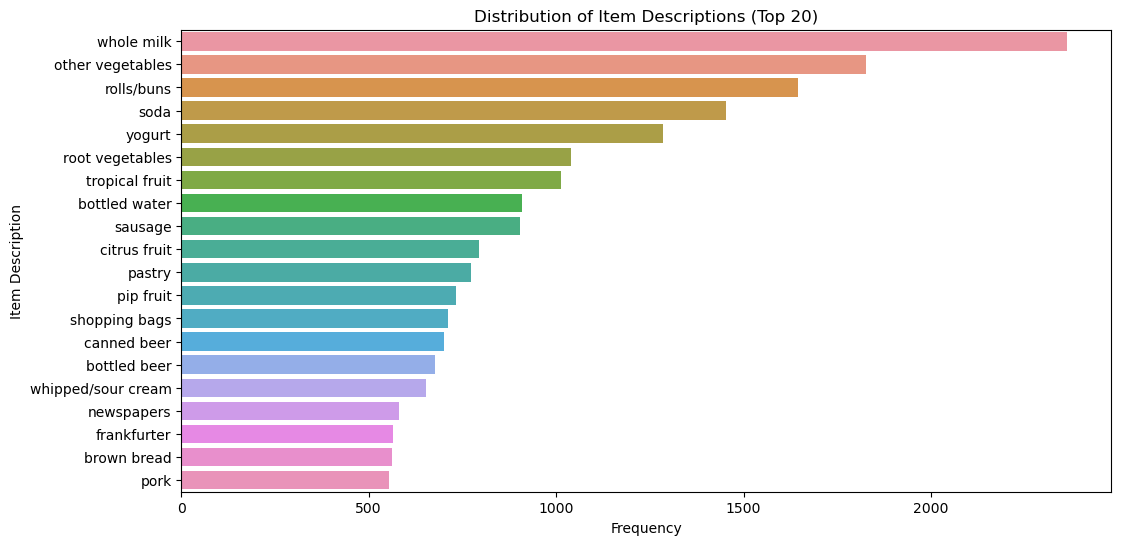

In [27]:
# 1. Bar plot: Distribution of Items (Top 20)
plt.figure(figsize=(12, 6))
sns.countplot(y='itemDescription', data=df, order=df['itemDescription'].value_counts().index[:20])
plt.title('Distribution of Item Descriptions (Top 20)')
plt.xlabel('Frequency')
plt.ylabel('Item Description')
plt.show()

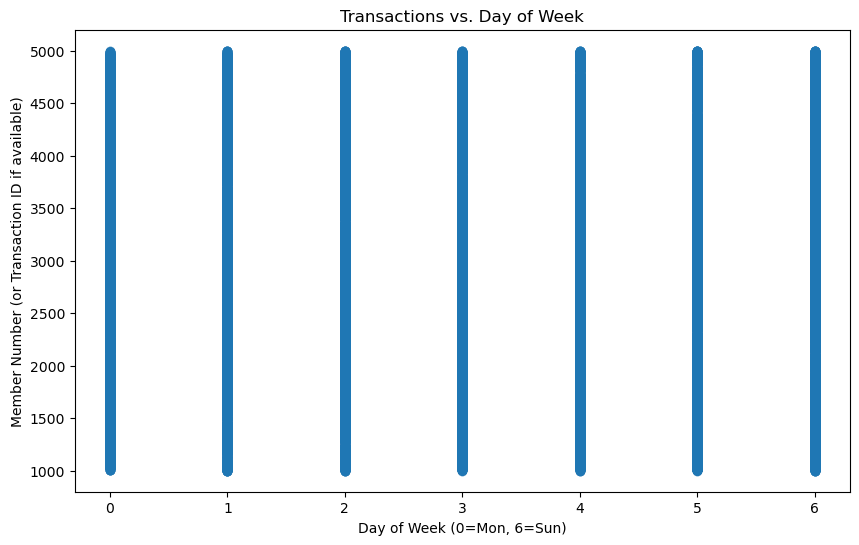

In [28]:
# 2. Scatter plot: Transactions vs. Day of Week
plt.figure(figsize=(10, 6))
plt.scatter(df['day_of_week'], df['Member_number'], alpha=0.5)  # Example scatter plot
plt.title('Transactions vs. Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Member Number (or Transaction ID if available)')  # Adjust label as needed
plt.show()

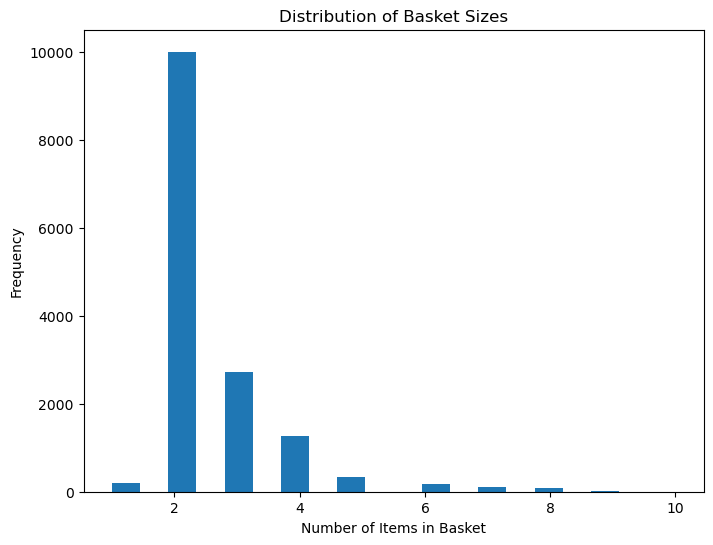

In [29]:
# 3. Histogram: Distribution of Basket Sizes
basket_sizes = df.groupby(['Member_number', 'Date'])['itemDescription'].count()
plt.figure(figsize=(8, 6))
plt.hist(basket_sizes, bins=20)  # Adjust the number of bins as needed
plt.title('Distribution of Basket Sizes')
plt.xlabel('Number of Items in Basket')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Encode categorical variables
le = LabelEncoder()
df['itemDescription'] = le.fit_transform(df['itemDescription'])
df['day_of_week'] = le.fit_transform(df['day_of_week'])

In [39]:
# Association Rule Mining - Apriori Algorithm
# Create a DataFrame suitable for association rule mining with one-hot encoding

# Pivot table to create a transactional dataset with binary values (0 or 1)
basket_df = df.pivot_table(index='Member_number', columns='itemDescription', aggfunc='size', fill_value=0)

# Convert the basket DataFrame values to boolean (True/False)
basket_df = basket_df.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_df, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
print(rules.head())

  antecedents consequents  antecedent support  consequent support   support  \
0         (8)       (102)            0.119548            0.376603  0.050795   
1       (102)         (8)            0.376603            0.119548  0.050795   
2         (8)       (164)            0.119548            0.458184  0.064135   
3       (164)         (8)            0.458184            0.119548  0.064135   
4        (11)       (102)            0.158799            0.376603  0.068497   

   confidence      lift  representativity  leverage  conviction  \
0    0.424893  1.128223               1.0  0.005773    1.083966   
1    0.134877  1.128223               1.0  0.005773    1.017719   
2    0.536481  1.170886               1.0  0.009360    1.168919   
3    0.139978  1.170886               1.0  0.009360    1.023754   
4    0.431341  1.145345               1.0  0.008692    1.096257   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.129082  0.114055   0.077462    0.279885  
1       0.182309  

C:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
